<a href="https://colab.research.google.com/github/Harikasaina/ProjetPSD/blob/master/PSD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## M1
### Enjeux de la personnalisation marketing
SWOT pour la Personnalisation Marketing\
Forces :\
Donn√©es Abondantes : Acc√®s √† de grandes quantit√©s de donn√©es clients pour une personnalisation pr√©cise.\
Technologies Avanc√©es : Utilisation de l'IA pour analyser les donn√©es et automatiser les processus marketing.\
Personnalisation : Capacit√© √† offrir des exp√©riences client hautement personnalis√©es, augmentant l'engagement et la fid√©lit√©.\
Faiblesses :\
Confidentialit√© des Donn√©es : Risques li√©s √† la collecte et √† l'utilisation des donn√©es personnelles des clients.\
D√©pendance Technologique : Besoin constant de technologies avanc√©es et de comp√©tences sp√©cifiques pour les exploiter.\
Co√ªts √âlev√©s : Investissements importants n√©cessaires pour mettre en place et maintenir des strat√©gies de personnalisation efficaces.\
Opportunit√©s :\
March√©s Cibl√©s : Capacit√© √† atteindre des segments de march√© tr√®s sp√©cifiques avec des messages personnalis√©s.\
Am√©lioration Continue : Utilisation des donn√©es pour continuellement am√©liorer et adapter les strat√©gies marketing. Fid√©lisation Client : Augmentation de la fid√©lit√© client gr√¢ce √† des exp√©riences personnalis√©es.\
Menaces :\
R√©glementations : √âvolution des lois sur la protection des donn√©es pouvant impacter les strat√©gies de personnalisation.\
Concurrence : Risque que les concurrents adoptent des strat√©gies similaires ou plus efficaces.\
Saturation : Risque de saturation des clients avec trop de messages personnalis√©s, pouvant mener √† une lassitude.\

## M2  

In [25]:
import numpy as np
import os
os.environ["OMP_NUM_THREADS"] = "1"
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier, plot_importance

import joblib

### Nettoyage,visualisation,r√©sum√© des donn√©es clients

‚úÖ Fichier 'cleaned_customers.csv' cr√©√© avec succ√®s.

--- R√©sum√© des Donn√©es Clients ---

R√©sum√© Statistique Global :
              Age  Total_Spent
count  100.000000   100.000000
mean    43.090000   612.888500
std     13.821441   229.050449
min     18.000000   203.550000
25%     31.750000   443.960000
50%     44.000000   639.415000
75%     55.000000   790.385000
max     65.000000   995.570000

R√©partition par Genre :
Gender
Male      52
Female    48
Name: count, dtype: int64

Top 5 des villes par nombre de clients :
Location
Atlanta        14
Seattle        14
Phoenix        11
New York       10
Los Angeles    10
Name: count, dtype: int64

D√©penses Moyennes par Genre :
Gender
Female    639.112500
Male      588.681731
Name: Total_Spent, dtype: float64

--- Visualisations des Donn√©es Clients ---


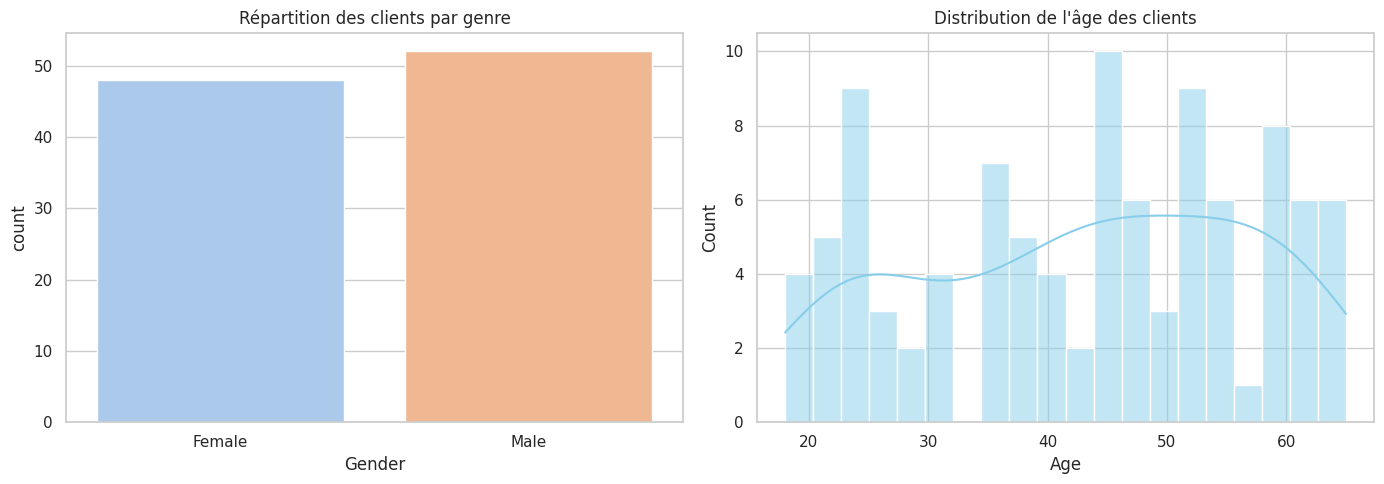

/tmp/ipython-input-2746195614.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations_spent.values, y=top_locations_spent.index, palette="viridis")


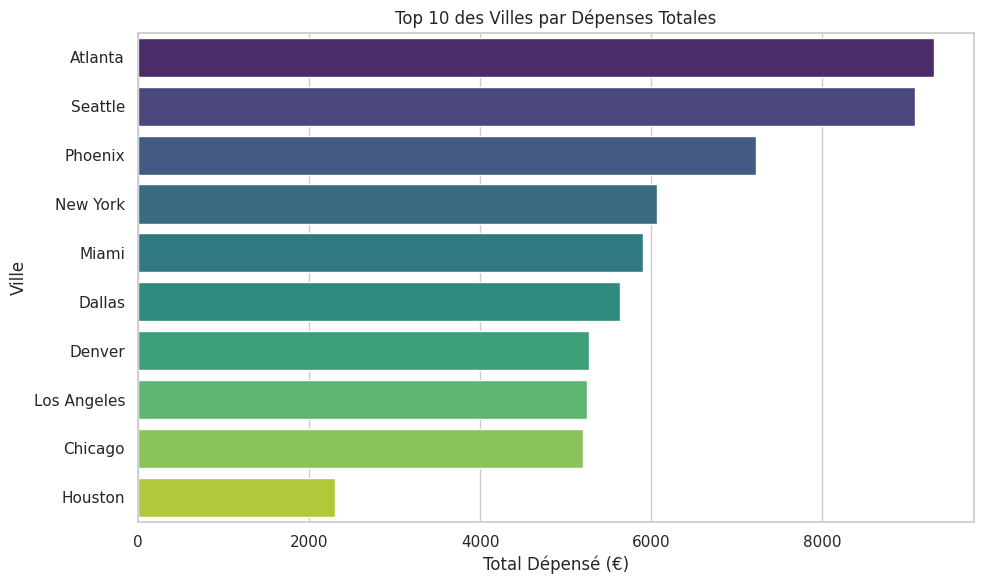

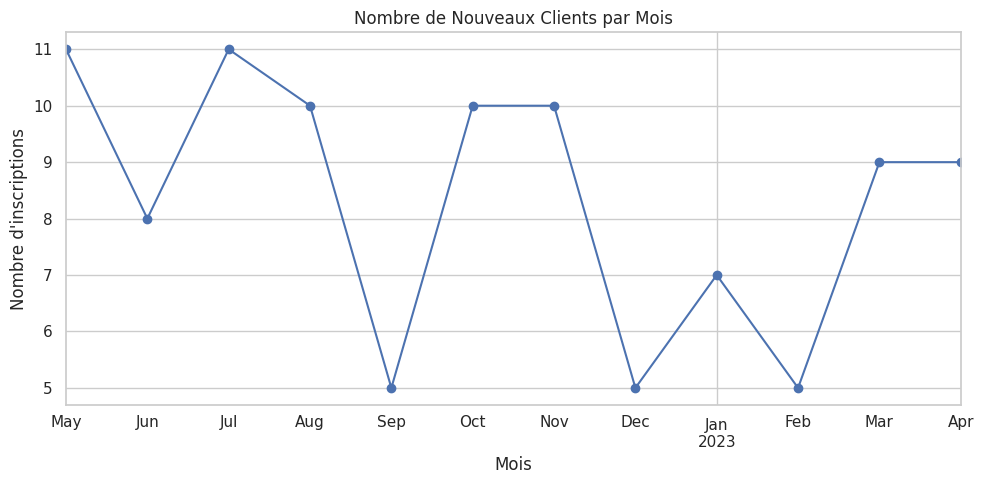

In [26]:
# --- 1. CHARGEMENT ET NETTOYAGE ---
# On charge le fichier une seule fois
df_customers = pd.read_csv("customers_data.csv")

# On applique toutes les √©tapes de nettoyage en s√©quence
df_customers.drop_duplicates(inplace=True)
df_customers.dropna(inplace=True)
df_customers['Customer_ID'] = pd.to_numeric(df_customers['Customer_ID'], errors='coerce')
df_customers['Age'] = pd.to_numeric(df_customers['Age'], errors='coerce')
df_customers['Total_Spent'] = pd.to_numeric(df_customers['Total_Spent'], errors='coerce')
df_customers['Join_Date'] = pd.to_datetime(df_customers['Join_Date'], errors='coerce')
df_customers.dropna(inplace=True) # On supprime les lignes o√π la conversion a √©chou√©

# Filtrage et formatage
df_customers = df_customers[(df_customers['Age'] >= 15) & (df_customers['Age'] <= 100)]
df_customers = df_customers[df_customers['Total_Spent'] >= 0]
df_customers['Name'] = df_customers['Name'].str.strip().str.title()
df_customers['Gender'] = df_customers['Gender'].str.strip().str.capitalize()
df_customers['Location'] = df_customers['Location'].str.strip().str.title()
df_customers.reset_index(drop=True, inplace=True)

# Sauvegarde du fichier nettoy√© pour une utilisation future
df_customers.to_csv("cleaned_customers.csv", index=False)
print("‚úÖ Fichier 'cleaned_customers.csv' cr√©√© avec succ√®s.")


# --- 2. R√âSUM√â STATISTIQUE ET INFORMATIONS CL√âS ---
print("\n--- R√©sum√© des Donn√©es Clients ---")
print("\nR√©sum√© Statistique Global :")
print(df_customers[['Age', 'Total_Spent']].describe())

print("\nR√©partition par Genre :")
print(df_customers['Gender'].value_counts())

print("\nTop 5 des villes par nombre de clients :")
print(df_customers['Location'].value_counts().head(5))

print("\nD√©penses Moyennes par Genre :")
print(df_customers.groupby('Gender')['Total_Spent'].mean())


# --- 3. VISUALISATIONS ---
print("\n--- Visualisations des Donn√©es Clients ---")
sns.set(style="whitegrid")

# Graphique 1 & 2 : Genre et √Çge
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=df_customers, x="Gender", hue="Gender", palette="pastel", legend=False)
plt.title("R√©partition des clients par genre")

plt.subplot(1, 2, 2)
sns.histplot(df_customers['Age'], bins=20, kde=True, color='skyblue')
plt.title("Distribution de l'√¢ge des clients")
plt.tight_layout()
plt.show()

# Graphique 3 : D√©penses totales par ville (top 10)
plt.figure(figsize=(10, 6))
top_locations_spent = df_customers.groupby("Location")["Total_Spent"].sum().nlargest(10)
sns.barplot(x=top_locations_spent.values, y=top_locations_spent.index, palette="viridis")
plt.title("Top 10 des Villes par D√©penses Totales")
plt.xlabel("Total D√©pens√© (‚Ç¨)")
plt.ylabel("Ville")
plt.tight_layout()
plt.show()

# Graphique 4 : √âvolution des inscriptions dans le temps
plt.figure(figsize=(10, 5))
monthly_join = df_customers.resample('ME', on='Join_Date')['Customer_ID'].count()
monthly_join.plot(marker='o', linestyle='-')
plt.title("Nombre de Nouveaux Clients par Mois")
plt.xlabel("Mois")
plt.ylabel("Nombre d'inscriptions")
plt.grid(True)
plt.tight_layout()
plt.show()

### Nettoyage,visualisation et resum√© de ventes

--- R√©sum√© des Donn√©es de Ventes ---

 Aper√ßu des donn√©es nettoy√©es :
   Sale_ID  Product_ID  Customer_ID       Date  Quantity  Sale_Price  \
0        1         133         2010 2023-04-07         1       70.28   
1        2         161         2069 2023-01-06         1      265.92   
2        3         106         2007 2023-02-23         3       87.54   
3        4         173         2036 2023-02-17         3       37.41   
4        5         118         2007 2023-03-05         5      127.16   

    Channel  Total_Sale  
0  In-Store       70.28  
1    Online      265.92  
2  In-Store      262.62  
3    Online      112.23  
4    Online      635.80  

 R√©sum√© statistique :
        Quantity  Sale_Price   Total_Sale
count  100.00000  100.000000   100.000000
mean     2.99000  156.902300   463.622100
std      1.47364   82.055663   357.892098
min      1.00000   11.680000    33.320000
25%      2.00000   91.627500   193.337500
50%      3.00000  153.140000   358.925000
75%      4.00000

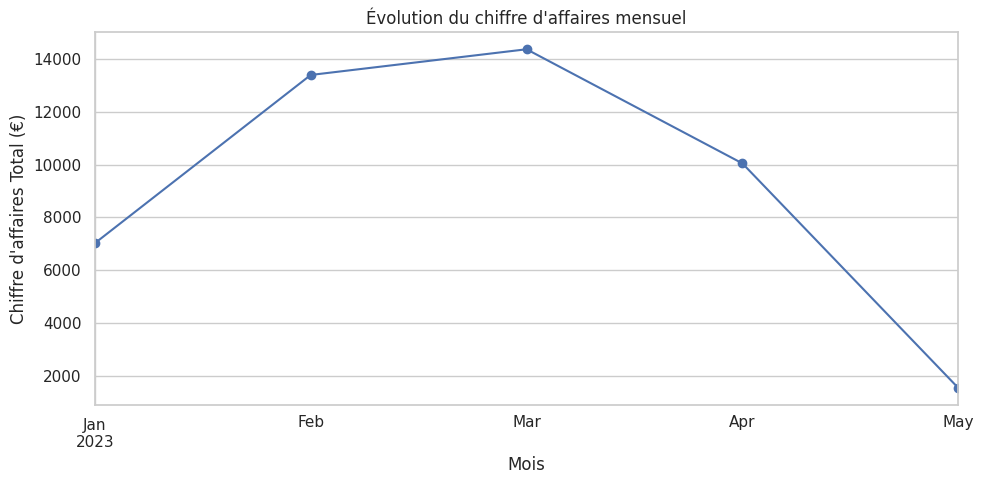

In [27]:
# --- 1. CHARGEMENT ET NETTOYAGE COMPLET ---
# On charge le fichier une seule fois
df_sales = pd.read_csv("sales_data.csv")

# On supprime les espaces dans les noms de colonnes
df_sales.columns = df_sales.columns.str.strip()

# On supprime les doublons et les lignes avec des valeurs manquantes critiques
df_sales.drop_duplicates(inplace=True)
df_sales.dropna(subset=['Customer_ID', 'Product_ID', 'Date'], inplace=True)

# Conversion des types de donn√©es (g√®re les erreurs en cr√©ant des NaN)
df_sales['Date'] = pd.to_datetime(df_sales['Date'], errors='coerce')
df_sales['Quantity'] = pd.to_numeric(df_sales['Quantity'], errors='coerce')
df_sales['Sale_Price'] = pd.to_numeric(df_sales['Sale_Price'], errors='coerce')

# On supprime les lignes o√π la conversion a √©chou√©
df_sales.dropna(inplace=True)

# Cr√©ation de la colonne de revenu total par vente
df_sales['Total_Sale'] = df_sales['Quantity'] * df_sales['Sale_Price']


# --- 2. R√âSUM√â STATISTIQUE ET INFORMATIONS CL√âS ---
print("--- R√©sum√© des Donn√©es de Ventes ---")
print("\n Aper√ßu des donn√©es nettoy√©es :")
print(df_sales.head())

print("\n R√©sum√© statistique :")
print(df_sales[['Quantity', 'Sale_Price', 'Total_Sale']].describe())

print("\n Informations g√©n√©rales :")
print(f" Nombre de ventes : {len(df_sales)}")
print(f" Nombre de clients uniques : {df_sales['Customer_ID'].nunique()}")
print(f" Nombre de produits uniques : {df_sales['Product_ID'].nunique()}")
print(f" P√©riode de vente : {df_sales['Date'].min().strftime('%Y-%m-%d')} √† {df_sales['Date'].max().strftime('%Y-%m-%d')}")

print("\n Nombre de ventes par canal :")
print(df_sales['Channel'].value_counts())

print("\n Top 5 produits les plus vendus :")
print(df_sales['Product_ID'].value_counts().head(5))

print("\n Chiffre d'affaires total par canal :")
print(df_sales.groupby("Channel")["Total_Sale"].sum())


# --- 3. VISUALISATIONS ---
print("\n--- Visualisations des Donn√©es de Ventes ---")
sns.set(style="whitegrid")

# Graphique 1 : Ventes totales par mois
plt.figure(figsize=(10, 5))
monthly_sales = df_sales.resample('ME', on='Date')['Total_Sale'].sum()
monthly_sales.plot(marker='o')
plt.title("√âvolution du chiffre d'affaires mensuel")
plt.xlabel("Mois")
plt.ylabel("Chiffre d'affaires Total (‚Ç¨)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Graphique 2 et 3 : Analyse par canal
plt.figure(figsize=(14, 6))

# Sous-graphique 1 : Nombre de ventes par canal
plt.subplot(1, 2, 1)
sns.countplot(data=df_sales, x="Channel", hue="Channel", palette="pastel", legend=False)
plt.title("Nombre de ventes par canal")

# Sous-graphique 2 : Distribution des prix par canal
plt.subplot(1, 2, 2)
sns.boxplot(data=df_sales, x="Channel", y="Sale_Price", hue="Channel", palette="Set2", legend=False)
plt.title("Distribution des prix de vente par canal")

plt.tight_layout()
plt.show()

### Nettoyages,visualisations et r√©sum√© des donn√©s produits

R√©sum√© descriptif des prix :
count    100.000000
mean     161.961200
std       76.570448
min       10.340000
25%      112.130000
50%      162.900000
75%      221.705000
max      293.250000
Name: Price, dtype: float64

Nombre de produits par cat√©gorie :
Category
Clothing       48
Accessories    23
Footwear       19
Outerwear      10
Name: count, dtype: int64

Nombre de produits par marque :
Brand
Brand D    19
Brand G    18
Brand B    17
Brand A    16
Brand E    13
Brand F    11
Brand C     6
Name: count, dtype: int64


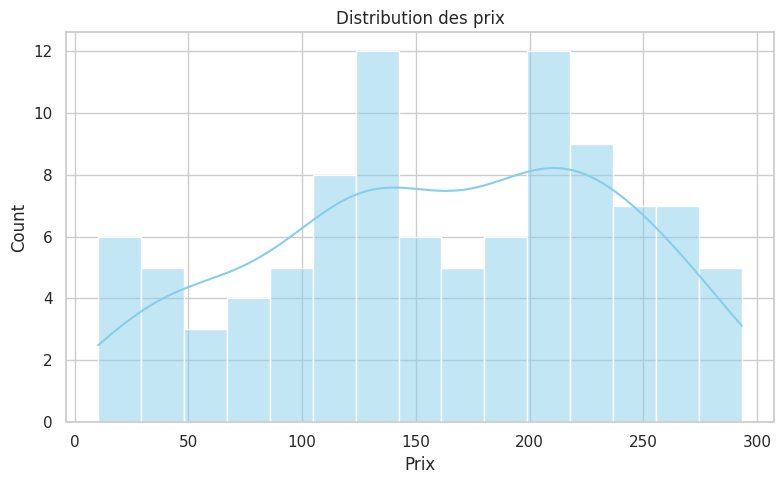

In [28]:
df = pd.read_csv("products_data.csv")

# 2. Nettoyage de base
df.columns = df.columns.str.strip()  # Supprime les espaces
df.drop_duplicates(inplace=True)    # Supprime les doublons
df.dropna(inplace=True)             # Supprime les lignes vides

# V√©rification des types de donn√©es
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df.dropna(subset=['Price'], inplace=True)

# 3. R√©sum√© statistique
print("R√©sum√© descriptif des prix :")
print(df['Price'].describe())

print("\nNombre de produits par cat√©gorie :")
print(df['Category'].value_counts())

print("\nNombre de produits par marque :")
print(df['Brand'].value_counts())

# 4. Visualisations
sns.set(style="whitegrid")

# a. R√©partition des produits par cat√©gorie
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Category', hue='Category', palette='Set2', legend=False)

plt.title("Nombre de produits par cat√©gorie")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# b. R√©partition des produits par marque
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Brand', hue='Brand', palette='Set3', legend=False)

plt.title("Nombre de produits par marque")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# c. Distribution des prix
plt.figure(figsize=(8, 5))
sns.histplot(df['Price'], bins=15, kde=True, color='skyblue')
plt.title("Distribution des prix")
plt.xlabel("Prix")
plt.tight_layout()
plt.show()

# d. Boxplot des prix par cat√©gorie
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Category', hue='Category', y='Price', palette='coolwarm')
plt.title("Prix des produits par cat√©gorie")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## M3 Cr√©ations des clusters bas√©s sur l'√¢ge,depenses et produits achet√©s

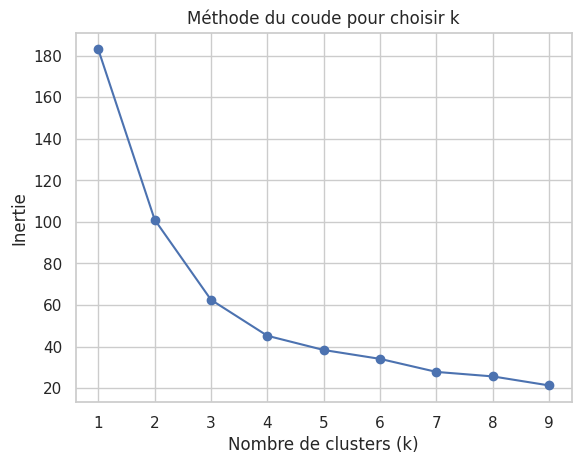

nCluster2
             Age  Total_Spent  Products_Bought
count   6.000000     6.000000         6.000000
mean   29.000000  2306.350000         3.500000
std     9.011104   863.039778         0.547723
min    19.000000  1307.200000         3.000000
25%    23.000000  1670.797500         3.000000
50%    26.500000  2384.150000         3.500000
75%    36.000000  2576.500000         4.000000
max    41.000000  3688.970000         4.000000
nCluster0
             Age  Total_Spent  Products_Bought
count  11.000000    11.000000        11.000000
mean   50.000000  1338.067273         2.545455
std     9.838699   462.494669         0.522233
min    35.000000   488.260000         2.000000
25%    44.000000  1155.315000         2.000000
50%    53.000000  1331.010000         3.000000
75%    57.000000  1537.640000         3.000000
max    63.000000  2234.920000         3.000000
nCluster1
             Age  Total_Spent  Products_Bought
count  21.000000    21.000000        21.000000
mean   27.047619   357.525238 

In [29]:
# chargement de deux fichiers
sales_df = pd.read_csv("sales_data.csv")  # Fichier des ventes
customers_df = pd.read_csv("customers_data.csv")  # Fichier clients

# --- Nettoyage des donn√©es  ---
sales_df['Sale_Price'] = pd.to_numeric(sales_df['Sale_Price'], errors='coerce')
sales_df['Quantity'] = pd.to_numeric(sales_df['Quantity'], errors='coerce')
sales_df['Total_Sale'] = sales_df['Quantity'] * sales_df['Sale_Price']
sales_df.dropna(subset=["Customer_ID", "Total_Sale"], inplace=True)

# Fusion des donn√©es clients + ventes
df = pd.merge(customers_df, sales_df, on="Customer_ID")

# --- Agr√©gation par client ---
client_features = df.groupby("Customer_ID").agg({
    "Age": "first",  # √¢ge du client
    "Total_Sale": "sum",  # d√©penses totales
    "Product_ID": "nunique"  # nombre de produits diff√©rents achet√©s
}).rename(columns={
    "Total_Sale": "Total_Spent",
    "Product_ID": "Products_Bought"
}).reset_index()

# --- Standardisation des variables ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(client_features[["Age", "Total_Spent", "Products_Bought"]])

# --- D√©termination du nombre optimal de clusters (optionnel) ---
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, marker='o')
plt.title("M√©thode du coude pour choisir k")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Inertie")
plt.show()

# --- K-Means clustering final ---
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
client_features['Cluster'] = kmeans.fit_predict(X_scaled)

# --- Visualisation des clusters ---
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=client_features,
                x="Total_Spent", y="Age",
                hue="Cluster", palette="Set2", s=100)
plt.title("Clustering des clients (√Çge vs D√©penses)")
plt.xlabel("Total D√©pens√©")
plt.ylabel("√Çge")
plt.legend(title="Cluster")
plt.show()


for i in client_features['Cluster'].unique():
    print(f"nCluster{i}")
    print( client_features[client_features['Cluster']==i][['Age','Total_Spent','Products_Bought']].describe())


## M4 Identification des caract√©ristiques et pr√©f√©rences de chaque segment

In [30]:
# Statistiques g√©n√©rales par cluster
cluster_summary = client_features.groupby("Cluster").agg({
    "Age": ["mean", "min", "max"],
    "Total_Spent": ["mean", "sum"],
    "Products_Bought": ["mean", "max", "min"],
    "Customer_ID": "count"
}).rename(columns={"Customer_ID": "Nb_Clients"})

print(" R√©sum√© des clusters :")
print(cluster_summary)


 R√©sum√© des clusters :
               Age          Total_Spent           Products_Bought          \
              mean min max         mean       sum            mean max min   
Cluster                                                                     
0        50.000000  35  63  1338.067273  14718.74        2.545455   3   2   
1        27.047619  18  38   357.525238   7508.03        1.095238   2   1   
2        29.000000  19  41  2306.350000  13838.10        3.500000   4   3   
3        52.130435  41  65   447.710435  10297.34        1.173913   2   1   

        Nb_Clients  
             count  
Cluster             
0               11  
1               21  
2                6  
3               23  


Cluster 0 ‚Äì Seniors d√©pensiers
√Çge moyen : 50 ans
Total d√©pens√© moyen : 1338 ‚Ç¨
Nombre de produits achet√©s : 2 √† 3 (moyenne : 2.55)
Nombre de clients : 11

Profil :
Ce sont des clients plus √¢g√©s, qui d√©pensent relativement beaucoup.
Ils ach√®tent peu de produits, mais leur panier moyen est √©lev√©.
Pr√©f√©rence : Qualit√© > quantit√© ‚Äì ils sont sans doute sensibles √† des produits premium ou bien cibl√©s.

 Cluster 1 ‚Äì Jeunes √† faible pouvoir d‚Äôachat
√Çge moyen : 27 ans
Total d√©pens√© moyen : 357 ‚Ç¨
Produits achet√©s : 1 produit en g√©n√©ral
Nombre de clients : 21

Profil :
Jeunes adultes avec un budget limit√©.
Tr√®s peu d‚Äôachats, faible valeur client.
Pr√©f√©rence : Offres promotionnelles, premiers prix, contenu dynamique et engageant

 Cluster 2 ‚Äì Jeunes tr√®s rentables
√Çge moyen : 29 ans
Total d√©pens√© moyen : 2306 ‚Ç¨ (le plus √©lev√©)
Produits achet√©s : 3 √† 4 (moyenne : 3.5)
Nombre de clients : 6

Profil :
Petits en nombre, mais tr√®s importants en valeur.
Ils sont jeunes et ach√®tent beaucoup.
Pr√©f√©rence : Produits tendance, nouveaut√©s, cross-selling pertinent.

 Cluster 3 ‚Äì Seniors mod√©r√©s
√Çge moyen : 52 ans
Total d√©pens√© moyen : 447 ‚Ç¨
Produits achet√©s : 1 √† 2
Nombre de clients : 23
Profil :

Population plus √¢g√©e, mais au pouvoir d‚Äôachat mod√©r√©.
Ach√®tent peu, mais sont nombreux.
Pr√©f√©rence : Fiabilit√©, service client, produits classiques.

 Recommandations marketing
Cluster 0 : Campagnes premium, exclusivit√©, service VIP.
Cluster 1 : R√©ductions, contenu sur TikTok / Instagram, offres de bienvenue.
Cluster 2 : Fid√©lisation forte, bundles, recommandations personnalis√©es.
Cluster 3 : Newsletters informatives, assurance qualit√©, confiance dans la marque.



## M5 Analyse des performance des campagnes marketing

In [31]:
try:
    # 1. Charger le fichier brut des campagnes
    df = pd.read_csv("marketing_data.csv")

    # 2. Calculer les indicateurs de performance (KPIs) de mani√®re s√©curis√©e

    # On v√©rifie que les Impressions > 0 avant de diviser
    df["CTR (%)"] = np.where(df["Impressions"] > 0, (df["Clicks"] / df["Impressions"]) * 100, 0)

    # On v√©rifie que les Clics > 0 avant de diviser
    df["CPC (‚Ç¨)"] = np.where(df["Clicks"] > 0, df["Budget"] / df["Clicks"], 0)

    # Simuler les conversions si elles n'existent pas
    if "Conversions" not in df.columns:
        df["Conversions"] = (df["Clicks"] * 0.03).astype(int)

    # On v√©rifie que les Clics > 0 avant de diviser
    df["Conversion_Rate (%)"] = np.where(df["Clicks"] > 0, (df["Conversions"] / df["Clicks"]) * 100, 0)

    # On v√©rifie que les Conversions > 0 avant de diviser
    df["CPA (‚Ç¨)"] = np.where(df["Conversions"] > 0, df["Budget"] / df["Conversions"], 0)

    # Revenu et Retour sur Investissement
    revenue_per_conversion = 100
    df["Revenue"] = df["Conversions"] * revenue_per_conversion

    # On v√©rifie que le Budget > 0 avant de diviser
    df["ROI (%)"] = np.where(df["Budget"] > 0, ((df["Revenue"] - df["Budget"]) / df["Budget"]) * 100, 0)

    # 3. Sauvegarder le nouveau fichier propre en une seule fois
    df.to_csv("campaign_performance.csv", index=False)

    print("‚úÖ Le fichier 'campaign_performance.csv' a √©t√© cr√©√© avec succ√®s !")
    print("Aper√ßu du fichier g√©n√©r√© :")
    print(df.head())

except FileNotFoundError:
    print("‚ùå Erreur : Le fichier source 'marketing_data.csv' est introuvable.")
except Exception as e:
    print(f"‚ùå Une erreur est survenue : {e}")

‚úÖ Le fichier 'campaign_performance.csv' a √©t√© cr√©√© avec succ√®s !
Aper√ßu du fichier g√©n√©r√© :
   Campaign_ID Channel  Start_Date    End_Date   Budget  Impressions  Clicks  \
0            1   Email  2023-02-24  2023-03-23  4509.70        96713    2885   
1            2   Email  2023-01-14  2023-01-21  4473.50        71432    4310   
2            3   Email  2023-02-18  2023-03-18   821.52        57724    3805   
3            4  Social  2023-03-02  2023-03-24  3254.82        59843     935   
4            5      TV  2023-01-02  2023-01-15  1085.03        10743    3347   

   Conversions    CTR (%)   CPC (‚Ç¨)  Conversion_Rate (%)    CPA (‚Ç¨)  Revenue  \
0          189   2.983053  1.563154             6.551127  23.860847    18900   
1          165   6.033710  1.037935             3.828306  27.112121    16500   
2         1482   6.591712  0.215905            38.948752   0.554332   148200   
3          337   1.562422  3.481091            36.042781   9.658220    33700   
4         13

## M6 Pr√©diction de churn

In [32]:
# --- 1. Chargement et pr√©paration des donn√©es ---
try:
    customers = pd.read_csv("cleaned_customers.csv")
    sales = pd.read_csv("sales_data.csv")

    # Cr√©ation des features
    customer_features = sales.groupby("Customer_ID").agg(
        Total_Spent_Calc=("Sale_Price", "sum"),
        Total_Orders=("Sale_ID", "count"),
        Last_Purchase=("Date", "max")
    ).reset_index()

    customer_features["Last_Purchase"] = pd.to_datetime(customer_features["Last_Purchase"])
    reference_date = pd.to_datetime("2023-07-01")
    customer_features["Recency"] = (reference_date - customer_features["Last_Purchase"]).dt.days

    df = pd.merge(customers, customer_features, on="Customer_ID")
    df["Is_Loyal"] = (df["Total_Orders"] > 2).astype(int)

    # --- 2. Encodage et s√©lection des features ---
    df_encoded = pd.get_dummies(df, columns=["Gender", "Location"], drop_first=True)

    features_to_use = [col for col in df_encoded.columns if col not in [
        "Customer_ID", "Name", "Join_Date", "Last_Purchase", "Is_Loyal", "Total_Spent"
    ]]

    X = df_encoded[features_to_use]
    y = df_encoded["Is_Loyal"]

    # --- 3. Entra√Ænement du mod√®le final ---
    final_model = XGBClassifier(eval_metric='logloss', use_label_encoder=False)
    final_model.fit(X, y)

    # --- 4. Sauvegarde du mod√®le et des colonnes ---
    joblib.dump(final_model, 'loyalty_model.joblib')
    joblib.dump(X.columns.tolist(), 'model_columns.pkl')

    print("‚úÖ Mod√®le 'loyalty_model.joblib' et colonnes 'model_columns.pkl' sauvegard√©s avec succ√®s !")
    print("Vous pouvez maintenant les t√©l√©verser dans votre session Colab pour le dashboard.")

except FileNotFoundError:
    print("‚ùå Erreur : Assurez-vous que 'cleaned_customers.csv' et 'sales_data.csv' sont pr√©sents.")

‚úÖ Mod√®le 'loyalty_model.joblib' et colonnes 'model_columns.pkl' sauvegard√©s avec succ√®s !
Vous pouvez maintenant les t√©l√©verser dans votre session Colab pour le dashboard.


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [03:55:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy du mod√®le (fid√©lit√© client) : 1.0


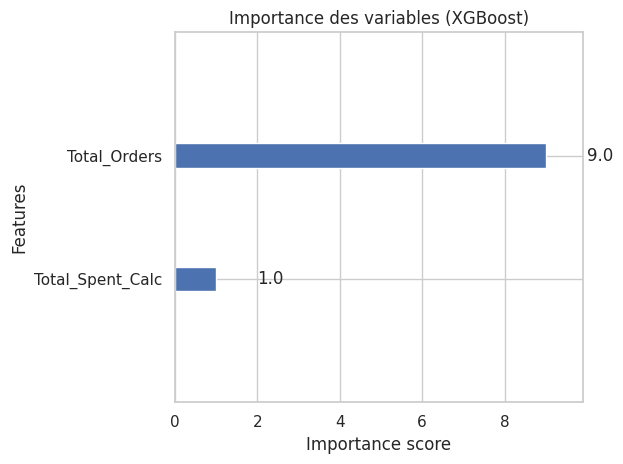

In [33]:
# 1. Charger les donn√©es
customers = pd.read_csv("cleaned_customers.csv")
sales = pd.read_csv("sales_data.csv")

# 2. Pr√©parer les features clients √† partir des ventes
customer_features = sales.groupby("Customer_ID").agg({
    "Sale_Price": "sum",
    "Sale_ID": "count",
    "Quantity": "sum",
    "Date": "max"
}).rename(columns={
    "Sale_Price": "Total_Spent_Calc",
    "Sale_ID": "Total_Orders",
    "Quantity": "Total_Quantity",
    "Date": "Last_Purchase"
}).reset_index()

# 3. Calculer la r√©cence
customer_features["Last_Purchase"] = pd.to_datetime(customer_features["Last_Purchase"])
reference_date = pd.to_datetime("2023-07-01")
customer_features["Recency"] = (reference_date - customer_features["Last_Purchase"]).dt.days

# 4. Fusion avec les donn√©es clients nettoy√©es
df = pd.merge(customers, customer_features, on="Customer_ID")

# 5. Cr√©er la variable cible (client fid√®le : >2 commandes)
df["Is_Loyal"] = df["Total_Orders"].apply(lambda x: 1 if x > 2 else 0)

# 6. Encodage des variables cat√©gorielles
df = pd.get_dummies(df, columns=["Gender", "Location"], drop_first=True)

# 7. Pr√©paration des features et de la cible
X = df.drop(columns=["Customer_ID", "Name", "Join_Date", "Last_Purchase", "Is_Loyal", "Total_Spent"])
y = df["Is_Loyal"]

# 8. Division des donn√©es
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 9. Entra√Ænement du mod√®le XGBoost
model = XGBClassifier(eval_metric='logloss')

model.fit(X_train, y_train)

# 10. Pr√©diction et √©valuation
preds = model.predict(X_test)
accuracy = accuracy_score(y_test, preds)
print("Accuracy du mod√®le (fid√©lit√© client) :", round(accuracy, 4))

# 11. Importance des variables
plot_importance(model)
plt.title("Importance des variables (XGBoost)")
plt.tight_layout()
plt.show()


###  exemple d'une  pr√©diction

In [34]:
columns_model = ['Age', 'Total_Spent_Calc', 'Total_Orders', 'Total_Quantity', 'Recency',
                 'Gender_Male', 'Location_Chicago', 'Location_Dallas', 'Location_Denver',
                 'Location_Houston', 'Location_Los Angeles', 'Location_Miami',
                 'Location_New York', 'Location_Phoenix', 'Location_Seattle']

input_data = {col: 0 for col in columns_model}
input_data.update({
    'Age': 30,
    'Total_Spent_Calc': 1200.50,
    'Total_Orders': 3,
    'Total_Quantity': 10,
    'Recency': 20,
    'Gender_Male': 1,
    'Location_New York': 1  # Choisir une seule localisation possible
})
sample_df = pd.DataFrame([input_data])
pred_class = model.predict(sample_df)[0]
pred_proba = model.predict_proba(sample_df)[0][1]

print("Classe pr√©dite :", pred_class)
print("Probabilit√© d'√™tre fid√®le :", round(pred_proba * 100, 2), "%")

Classe pr√©dite : 1
Probabilit√© d'√™tre fid√®le : 89.11 %


# M7 Elaboration d'une strat√©gie Marketing digitale

#### Ciblage personnalis√©

| Segment             | Canal recommand√©    | Type de contenu                      | Budget sugg√©r√© (‚Ç¨) | Objectif     |
| ------------------- | ------------------- | ------------------------------------ | ------------------ | ------------ |
| Fid√®les             | Email + App         | Programme VIP, r√©ductions exclusives | 30‚Äì40 ‚Ç¨/client     | Fid√©lisation |
| Nouveaux clients    | Social Media        | Tutoriels, t√©moignages, -10% off     | 15‚Äì20 ‚Ç¨/client     | Conversion   |
| Clients √† r√©activer | SMS + Email         | ‚ÄúOn vous a manqu√©‚Äù + -15%            | 20‚Äì25 ‚Ç¨/client     | R√©activation |
| Inactifs            | TV/Display/Retarget | Branding + Offre flash               | 10 ‚Ç¨/client        | Notori√©t√©    |


# M8-M9 Dashboard et Rapport final

Cr√©ations de fichier pour cr√©er le dashboard


In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

try:
    # 1. Charger les donn√©es de base
    customers_df = pd.read_csv("cleaned_customers.csv")
    sales_df = pd.read_csv("sales_data.csv")

    # --- MODIFICATION CL√â ---
    # On supprime l'ancienne colonne 'Total_Spent' pour √©viter les conflits
    if 'Total_Spent' in customers_df.columns:
        customers_df = customers_df.drop('Total_Spent', axis=1)

    # 2. Agr√©ger les donn√©es de vente pour recalculer les features
    aggregated_features = sales_df.groupby("Customer_ID").agg(
        Total_Spent=("Sale_Price", "sum"),
        Products_Bought=("Product_ID", "nunique")
    ).reset_index()

    # 3. Fusionner les donn√©es clients (sans 'Total_Spent') avec les nouvelles features
    client_features_complete = pd.merge(customers_df, aggregated_features, on="Customer_ID", how="left")
    client_features_complete.fillna(0, inplace=True)

    # 4. Standardisation et Clustering
    features_for_scaling = client_features_complete[["Age", "Total_Spent", "Products_Bought"]]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(features_for_scaling)

    kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
    client_features_complete['Cluster'] = kmeans.fit_predict(X_scaled)

    # 5. Sauvegarder le fichier final et propre
    client_features_complete.to_csv("clustered_clients01.csv", index=False)

    print("‚úÖ Le fichier 'clustered_clients01.csv' a √©t√© recr√©√© avec succ√®s !")
    print("Aper√ßu des colonnes :", client_features_complete.columns.tolist())

except FileNotFoundError:
    print("‚ùå Erreur : Assurez-vous que 'cleaned_customers.csv' et 'sales_data.csv' sont bien t√©l√©vers√©s.")
except Exception as e:
    print(f"‚ùå Une erreur est survenue : {e}")

‚úÖ Le fichier 'clustered_clients01.csv' a √©t√© recr√©√© avec succ√®s !
Aper√ßu des colonnes : ['Customer_ID', 'Name', 'Age', 'Gender', 'Location', 'Join_Date', 'Total_Spent', 'Products_Bought', 'Cluster']


In [36]:
# Charger les fichiers CSV
customers = pd.read_csv("cleaned_customers.csv")
sales = pd.read_csv("sales_data.csv")
campaigns = pd.read_csv("marketing_data.csv")

# Fusion clients + ventes (sur Customer_ID)
merged_df = pd.merge(sales, customers, on="Customer_ID", how="left")

# Fusion avec campagnes (si campagne li√©e √† une vente)
if "Campaign_ID" in merged_df.columns and "Campaign_ID" in campaigns.columns:
    merged_df = pd.merge(merged_df, campaigns, on="Campaign_ID", how="left")

# Enregistrer le fichier fusionn√©
merged_df.to_csv("merged_data.csv", index=False)

print(" Fichier fusionn√© enregistr√© sous 'merged_data.csv'")


 Fichier fusionn√© enregistr√© sous 'merged_data.csv'


In [37]:
import pandas as pd

# 1. Charger les donn√©es
df = pd.read_csv("merged_data.csv")

# 2. Conversion des dates
df["Date"] = pd.to_datetime(df["Date"])
df["Join_Date"] = pd.to_datetime(df["Join_Date"])

# 3. Agr√©gation des ventes par client
customer_features = df.groupby("Customer_ID").agg({
    "Sale_Price": "sum",
    "Sale_ID": "count",
    "Quantity": "sum",
    "Date": "max",
    "Age": "first",
    "Gender": "first",
    "Location": "first",
    "Join_Date": "first",
    "Total_Spent": "first",  # d√©j√† pr√©sent, sinon recalculable
    "Name": "first"
}).rename(columns={
    "Sale_Price": "Total_Spent_Calc",
    "Sale_ID": "Total_Orders",
    "Quantity": "Total_Quantity",
    "Date": "Last_Purchase"
}).reset_index()

# 4. Calcul de la r√©cence
reference_date = pd.to_datetime("2023-07-01")
customer_features["Recency"] = (reference_date - customer_features["Last_Purchase"]).dt.days

# 5. Variable cible : client fid√®le (>2 commandes)
customer_features["Is_Loyal"] = customer_features["Total_Orders"].apply(lambda x: 1 if x > 2 else 0)

# 6. Encodage des variables cat√©gorielles
customer_features_encoded = pd.get_dummies(customer_features, columns=["Gender", "Location"], drop_first=True)

# 7. Enregistrement du fichier enrichi
customer_features_encoded.to_csv("enriched_customers.csv", index=False)
df=pd.read_csv('enriched_customers.csv')
df.head(4)

Customer_ID  Total_Spent_Calc  Total_Orders  Total_Quantity Last_Purchase  \
0         2001            481.85             3               7    2023-04-05   
1         2004            372.70             3              11    2023-04-11   
2         2005             73.60             1               1    2023-04-14   
3         2006             20.18             1               5    2023-03-03   

   Age   Join_Date  Total_Spent    Name  Recency  ...  Gender_Male  \
0   26  2023-01-27       658.74   Laura       87  ...        False   
1   55  2022-08-18       693.76  Olivia       81  ...        False   
2   24  2022-12-02       447.59  Sophie       78  ...        False   
3   47  2022-08-07       804.71   Lucas      120  ...         True   

   Location_Chicago  Location_Dallas  Location_Denver  Location_Houston  \
0             False            False            False             False   
1             False            False            False             False   
2             False            False            False             False   
3             False             True            False             False   

   Location_Los Angeles  Location_Miami  Location_New York  Location_Phoenix  \
0                 False           False              False             False   
1                 False           False              False             False   
2                 False           False              False             False   
3                 False           False              False             False   

   Location_Seattle  
0             False  
1              True  
2             False  
3             False  

[4 rows x 21 columns]

In [38]:
# Colab cell 1
!pip install -q streamlit pyngrok pandas plotly kaleido reportlab scikit-learn xgboost
# pyngrok permet d'obtenir une URL publique (option)

In [41]:
%%writefile app.py
import streamlit as st
import pandas as pd
import plotly.express as px
import joblib
import warnings

# --- Configuration de la page ---
st.set_page_config(page_title="Dashboard Marketing PSD 2.0", layout="wide")
st.title("üìä Dashboard d'Analyse Marketing et Segmentation Client")

# --- MODIFICATION : Ignorer les avertissements inutiles de XGBoost ---
warnings.filterwarnings("ignore", category=UserWarning)

# --- Chargement des donn√©es et du mod√®le ---
@st.cache_data
def load_data():
    try:
        clients = pd.read_csv("clustered_clients01.csv")
        campaigns = pd.read_csv("campaign_performance.csv", engine='python')
        return clients, campaigns
    except FileNotFoundError:
        st.error("Erreur : Assurez-vous que les fichiers 'clustered_clients01.csv' et 'campaign_performance.csv' sont bien t√©l√©vers√©s.")
        return None, None

@st.cache_resource
def load_model():
    try:
        model = joblib.load('loyalty_model.joblib')
        columns = joblib.load('model_columns.pkl')
        return model, columns
    except FileNotFoundError:
        return None, None

clients_df, campaigns_df = load_data()
model, model_columns = load_model()

if clients_df is None or campaigns_df is None:
    st.error("Erreur : Fichiers de donn√©es introuvables. Veuillez les t√©l√©verser.")
    st.stop()

# --- Interface utilisateur ---
st.sidebar.header("Navigation")
page_options = ["üìà Vue d'ensemble", "üßë‚Äçü§ù‚Äçüßë Analyse des Segments", "üì¢ Performance des Campagnes"]
if model is not None:
    page_options.append("üîÆ Pr√©diction de Fid√©lit√©")

page = st.sidebar.radio("Choisissez une page :", page_options)

# ... Les 3 premi√®res pages
if page == "üìà Vue d'ensemble":
    st.header("Vue d'ensemble des Indicateurs Cl√©s")
    total_clients = clients_df['Customer_ID'].nunique()
    total_revenue = clients_df['Total_Spent'].sum()
    avg_revenue_per_client = total_revenue / total_clients
    col1, col2, col3 = st.columns(3)
    col1.metric("Nombre total de clients", f"{total_clients}")
    col2.metric("Chiffre d'affaires total", f"{total_revenue:,.2f} ‚Ç¨")
    col3.metric("Panier moyen par client", f"{avg_revenue_per_client:,.2f} ‚Ç¨")
    st.markdown("---")
    col_a, col_b = st.columns(2)
    with col_a:
        st.subheader("R√©partition des clients par segment")
        cluster_counts = clients_df['Cluster'].value_counts().reset_index()
        fig_pie = px.pie(cluster_counts, names='Cluster', values='count', title="Proportion de chaque segment")
        st.plotly_chart(fig_pie, use_container_width=True)
    with col_b:
        st.subheader("Chiffre d'affaires par segment")
        revenue_by_cluster = clients_df.groupby('Cluster')['Total_Spent'].sum().reset_index()
        fig_bar = px.bar(revenue_by_cluster, x='Cluster', y='Total_Spent', title="Contribution de chaque segment au CA", color='Cluster')
        st.plotly_chart(fig_bar, use_container_width=True)

elif page == "üßë‚Äçü§ù‚Äçüßë Analyse des Segments":
    st.header("Exploration d√©taill√©e des segments de clients")
    cluster_list = sorted(clients_df['Cluster'].unique())
    selected_cluster = st.selectbox("S√©lectionnez un segment √† analyser :", cluster_list)
    st.markdown(f"### Analyse du Segment {selected_cluster}")
    segment_df = clients_df[clients_df['Cluster'] == selected_cluster]
    seg1, seg2, seg3 = st.columns(3)
    seg1.metric("Nombre de clients", f"{segment_df['Customer_ID'].nunique()}")
    seg2.metric("√Çge moyen", f"{segment_df['Age'].mean():.1f} ans")
    seg3.metric("D√©pense moyenne", f"{segment_df['Total_Spent'].mean():,.2f} ‚Ç¨")
    st.markdown("---")
    col_c, col_d = st.columns(2)
    with col_c:
        st.subheader("Distribution de l'√¢ge")
        fig_age = px.histogram(segment_df, x='Age', nbins=20, title=f"Distribution de l'√¢ge (Segment {selected_cluster})")
        st.plotly_chart(fig_age, use_container_width=True)
    with col_d:
        st.subheader("Distribution des d√©penses")
        fig_spent = px.histogram(segment_df, x='Total_Spent', nbins=20, title=f"Distribution des d√©penses (Segment {selected_cluster})")
        st.plotly_chart(fig_spent, use_container_width=True)

elif page == "üì¢ Performance des Campagnes":
    st.header("Analyse de la Performance des Campagnes Marketing")
    total_budget = campaigns_df['Budget'].sum()
    total_revenue_campaigns = campaigns_df['Revenue'].sum()
    overall_roi = ((total_revenue_campaigns - total_budget) / total_budget) * 100 if total_budget > 0 else 0
    camp1, camp2, camp3 = st.columns(3)
    camp1.metric("Budget total investi", f"{total_budget:,.2f} ‚Ç¨")
    camp2.metric("Revenu total g√©n√©r√©", f"{total_revenue_campaigns:,.2f} ‚Ç¨")
    camp3.metric("ROI Global", f"{overall_roi:.2f} %")
    st.markdown("---")
    kpi_choice = st.selectbox("Choisissez un indicateur √† visualiser par canal :", ['ROI (%)', 'CTR (%)', 'CPA (‚Ç¨)', 'CPC (‚Ç¨)', 'Conversions'])
    st.subheader(f"{kpi_choice} par Canal Marketing")
    if kpi_choice in ['Conversions', 'Budget', 'Revenue']:
        perf_by_channel = campaigns_df.groupby('Channel')[kpi_choice].sum().reset_index()
    else:
        perf_by_channel = campaigns_df.groupby('Channel')[kpi_choice].mean().reset_index()
    fig_campaign = px.bar(perf_by_channel, x='Channel', y=kpi_choice, title=f"Performance ({kpi_choice}) par canal", color='Channel')
    st.plotly_chart(fig_campaign, use_container_width=True)

# ==============================================================================
# PAGE 4 : PR√âDICTION DE FID√âLIT√â
# ==============================================================================
elif page == "üîÆ Pr√©diction de Fid√©lit√©":
    st.header("Pr√©diction de la Fid√©lit√© d'un Client")

    if model is None or model_columns is None:
        st.error("Le mod√®le de pr√©diction n'est pas charg√©. Veuillez v√©rifier que les fichiers 'loyalty_model.joblib' et 'model_columns.pkl' sont bien t√©l√©vers√©s.")
    else:
        st.info("Entrez les informations d'un client pour pr√©dire sa probabilit√© d'√™tre fid√®le (plus de 2 commandes).")

        col1, col2 = st.columns(2)
        with col1:
            age = st.number_input("√Çge du client", 18, 100, 35)
            total_spent = st.number_input("Total d√©pens√© par le client (‚Ç¨)", 0.0, 10000.0, 500.0, 0.01)
            total_orders = st.number_input("Nombre total de commandes", 1, 100, 1)
            recency = st.number_input("Jours depuis le dernier achat (R√©cence)", 0, 365, 30)
            total_quantity = st.number_input("Quantit√© totale d'articles achet√©s", 1, 500, 10)

        with col2:
            gender = st.selectbox("Genre", ["Female", "Male"])
            locations = clients_df['Location'].unique().tolist()
            location = st.selectbox("Ville (Location)", locations)

        if st.button("Lancer la Pr√©diction"):
            input_data = pd.DataFrame(columns=model_columns)
            input_data.loc[0] = 0

            input_data['Age'] = age
            input_data['Total_Spent_Calc'] = total_spent
            input_data['Total_Orders'] = total_orders
            input_data['Recency'] = recency
            input_data['Total_Quantity'] = total_quantity

            if f"Gender_{gender}" in model_columns:
                input_data[f"Gender_{gender}"] = 1
            if f"Location_{location}" in model_columns:
                input_data[f"Location_{location}"] = 1

            input_data = input_data[model_columns]

            prediction_proba = model.predict_proba(input_data)[0][1]
            prediction_class = (prediction_proba > 0.5).astype(int)

            st.subheader("R√©sultat de la Pr√©diction")
            if prediction_class == 1:
                st.success(f"Ce client est susceptible d'√™tre **fid√®le**.")
            else:
                st.warning(f"Ce client est susceptible d'√™tre **occasionnel**.")

            # --- On convertit la probabilit√© en float standard ---
            st.progress(float(prediction_proba))
            st.metric(label="Probabilit√© d'√™tre fid√®le", value=f"{prediction_proba:.2%}")


# ==============================================================================
# # G√©n√©ration du rapport final en pdf
# ==============================================================================

from reportlab.lib.pagesizes import A4
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image as RLImage, PageBreak
from reportlab.lib.styles import getSampleStyleSheet
from reportlab.lib.units import cm
import pandas as pd
import os
import tempfile
import plotly.express as px

# --- Fonction pour sauvegarder les graphiques en images ---
def save_fig_to_png(fig, filename="figure.png"):
    try:
        path = os.path.join(tempfile.gettempdir(), filename)
        fig.update_layout(paper_bgcolor="white", plot_bgcolor="white")
        fig.write_image(path, width=1000, height=600, engine="kaleido", scale=2)
        return path
    except Exception:
        return None

# --- FONCTION DE G√âN√âRATION DE RAPPORT ---
def generer_rapport_final(clients_df, campaigns_df, model, model_columns):
    # Chemin et configuration du document
    doc = SimpleDocTemplate("rapport_final_ameliore.pdf", pagesize=A4, topMargin=2*cm, bottomMargin=2*cm)
    styles = getSampleStyleSheet()
    story = []

    # --- PAGE 1: TITRE ET INTRODUCTION (M1) ---
    story.append(Paragraph("Rapport Final - Analyse & Optimisation Marketing", styles['h1']))
    story.append(Spacer(1, 1*cm))
    story.append(Paragraph("<b>Objectif du projet (M1) :</b>", styles['h2']))
    story.append(Paragraph("Ce projet vise √† exploiter les donn√©es clients pour r√©aliser une segmentation pertinente, √©valuer la performance des campagnes et d√©velopper des strat√©gies marketing personnalis√©es gr√¢ce √† un mod√®le d'IA. L'enjeu principal est d'am√©liorer la fid√©lisation et le retour sur investissement.", styles['BodyText']))
    story.append(PageBreak())

    # --- PAGE 2: SEGMENTATION CLIENT (M3 & M4) ---
    story.append(Paragraph("Analyse des Segments Clients (M3 & M4)", styles['h1']))
    story.append(Spacer(1, 1*cm))
    story.append(Paragraph("L'analyse a permis d'identifier 4 segments distincts bas√©s sur l'√¢ge, les d√©penses et le comportement d'achat. La visualisation ci-dessous illustre ces clusters :", styles['BodyText']))
    story.append(Spacer(1, 0.5*cm))

    # Ajout du graphique des clusters
    fig_clusters = px.scatter(clients_df, x="Total_Spent", y="Age", color=clients_df["Cluster"].astype(str), title="Segments de Clients par √Çge et D√©penses")
    fig_path = save_fig_to_png(fig_clusters, "clusters.png")
    if fig_path:
        story.append(RLImage(fig_path, width=18*cm, height=12*cm))

    story.append(PageBreak())

    # --- PAGE 3: PERFORMANCE DES CAMPAGNES (M5) ---
    story.append(Paragraph("Performance des Campagnes (M5)", styles['h1']))
    story.append(Spacer(1, 1*cm))
    story.append(Paragraph("L'analyse du retour sur investissement (ROI) par canal montre des disparit√©s importantes, mettant en lumi√®re les canaux les plus rentables.", styles['BodyText']))
    story.append(Spacer(1, 0.5*cm))

    # Ajout du graphique du ROI
    roi_by_channel = campaigns_df.groupby('Channel')['ROI (%)'].mean().reset_index().sort_values("ROI (%)", ascending=False)
    fig_roi = px.bar(roi_by_channel, x="ROI (%)", y="Channel", title="ROI moyen par Canal")
    fig_path_roi = save_fig_to_png(fig_roi, "roi.png")
    if fig_path_roi:
        story.append(RLImage(fig_path_roi, width=16*cm, height=10*cm))

    story.append(PageBreak())

    # --- PAGE 4: MOD√àLE D'IA ET RECOMMANDATIONS (M6 & M7) ---
    story.append(Paragraph("Mod√®le d'IA et Recommandations (M6 & M7)", styles['h1']))
    story.append(Spacer(1, 1*cm))
    story.append(Paragraph("<b>Pr√©diction de la Fid√©lit√© (M6) :</b>", styles['h2']))
    story.append(Paragraph("Un mod√®le pr√©dictif (XGBoost) a √©t√© entra√Æn√© pour identifier les clients les plus susceptibles de devenir fid√®les. Cet outil permet de cibler proactivement les clients √† fort potentiel.", styles['BodyText']))

    # Ajout d'un exemple de pr√©diction
    input_data = pd.DataFrame([{'Age': 30, 'Total_Spent_Calc': 1200.50, 'Total_Orders': 3, 'Total_Quantity': 10, 'Recency': 20, 'Gender_Male': 1, 'Location_New York': 1}])
    input_aligned = input_data.reindex(columns=model_columns, fill_value=0)
    pred_proba = model.predict_proba(input_aligned)[0][1]
    story.append(Paragraph(f"<i>Exemple : Un client de 30 ans avec 3 commandes a <b>{pred_proba:.2%}</b> de chances d'√™tre fid√®le.</i>", styles['Italic']))

    story.append(Spacer(1, 1*cm))
    story.append(Paragraph("<b>Strat√©gie Recommand√©e (M7) :</b>", styles['h2']))
    story.append(Paragraph("‚Ä¢ <b>Clients √† haute valeur :</b> D√©ployer un programme VIP et des offres exclusives via email.", styles['BodyText']))
    story.append(Paragraph("‚Ä¢ <b>Nouveaux clients √† potentiel :</b> Lancer des campagnes de bienvenue sur les r√©seaux sociaux.", styles['BodyText']))
    story.append(Paragraph("‚Ä¢ <b>Clients occasionnels :</b> Utiliser des campagnes de r√©activation cibl√©es par SMS avec des promotions.", styles['BodyText']))

    # G√©n√©ration du PDF
    doc.build(story)
    print("‚úÖ Rapport PDF final am√©lior√© g√©n√©r√© : rapport_final.pdf")

# --- appel de la fonction ---
clients_df = pd.read_csv("clustered_clients01.csv")
campaigns_df = pd.read_csv("campaign_performance.csv")
model = joblib.load('loyalty_model.joblib')
model_columns = joblib.load('model_columns.pkl')
generer_rapport_final(clients_df, campaigns_df, model, model_columns)



# Bouton Streamlit
if os.path.exists("rapport_final.pdf"):
    with open("rapport_final.pdf", "rb") as f:
        st.download_button(
            label="üìÑ T√©l√©charger le Rapport Final",
            data=f,
            file_name="rapport_final.pdf",
            mime="application/pdf"
        )
else:
    st.warning("‚ö† Rapport non trouv√©. G√©n√®re-le d'abord.")


Overwriting app.py


In [40]:
from pyngrok import ngrok

# configurer token ngrok
!ngrok config add-authtoken "310f9NHe7TODVkEXYlGukf8aLO4_2DfCTc2fKFGXVZzVbvtzF"

# Lance l'application Streamlit en arri√®re-plan
!streamlit run app.py &>/dev/null&

# Ouvre un tunnel public et affiche le lien
public_url = ngrok.connect(8501)
print(f"üéâ Votre dashboard est pr√™t ! Cliquez sur ce lien pour y acc√©der : {public_url}")

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
üéâ Votre dashboard est pr√™t ! Cliquez sur ce lien pour y acc√©der : NgrokTunnel: "https://dcbb7e75dc4b.ngrok-free.app" -> "http://localhost:8501"
